
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Some of which are:
>* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>* ‘Neighborhood’ indicates the location of the hospital.
>* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>* ‘SMS_received’ indicates whether the patient received an sms or not
>* ‘No-show’ indicates whether the patient showed up or not

> It has 14 columns in all


 


### Question(s) for Analysis
>1. Does gender affect the level of show-ups across the days
>2. Which days of the week has the most and least show-ups
>3. How does SMS receipt affect show-up


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading data and printing first five lines

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# getting number of rows and columns in data
df.shape

(110527, 14)

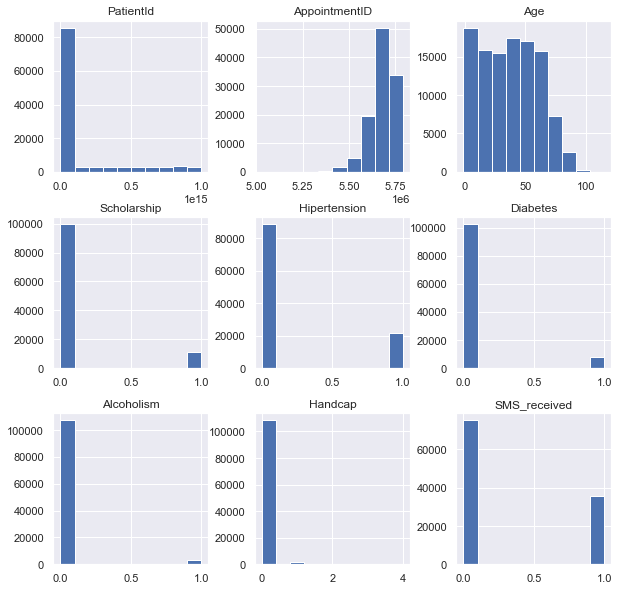

In [4]:
# gaining some general insights on the dataset
sns.set()
df.hist(figsize=(10,10));

In [5]:
# generate summary of descriptive satistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>* Looking at the age column reveals a min value of -1 which is probably a mistake 

In [6]:
# getting concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>* Inspecting the data type shows that **ScheduledDay** and **AppointmentDay** are string. For better manipulation a **datetime** data type would be preferable
>* Also **No-show** is a string however, an **int** datatype is preferable For statistical operations

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Result of data wrangling
>* There are 110527 rows and 14 columns
>* No Null values
>* ScheduledDay and AppointmentDay are not **datetime** datatype but strings. should be converted to datatime for better manipulation
>* No-show is string datatype. should be converted to **int** for better statistical operations
>* Hipertension and handcap column was mistyped
>* SMS_received and No-show should be renamed to be consistent with other column names
>* age column contain a -1 value which is probably a mistake


### Data Cleaning
#### Below are the steps taken to clean the data
> 1. Change AppointmentDay and ScheduledDay to datetime datatype
2. Change No-show to int
3. Rename mistyped columns - hipertension and handcap 
4. Rename SMS_received  and No-show columns to be consistent with other column names
5. Drop row with -1 age
6. Add column to keep track of appointment day of the week

In [8]:
#converting appointmentDay and ScheduledDay columns to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# confirming change
df['AppointmentDay'].dtype, df['ScheduledDay'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

In [9]:
# changing No-show column to int; 0 for yes(didn't kep the appointment) and 1 for No(kept the appointment)
df['No-show'] = df['No-show'].replace({'Yes': 0, 'No':1})

#confimring change
df['No-show'].dtype

dtype('int64')

In [10]:
# Rename mistyped columns and No-show and SMS_received for consistency
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'Noshow', 'SMS_received': 'SMSreceived'},
          inplace=True)

# confirming result
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Noshow'],
      dtype='object')

In [11]:
# drop row where age = -1 
index = df[df['Age'] == -1].index
df.drop(index, inplace=True)

# confirming result
df.Age.min()

0

In [12]:
# making a column for the days of the appointment
Appointment_Day = df.AppointmentDay.dt.day_name()
df.insert(5, 'ApDayOfWeek', Appointment_Day)


In [13]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,ApDayOfWeek,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   ApDayOfWeek     110526 non-null  object             
 6   Age             110526 non-null  int64              
 7   Neighbourhood   110526 non-null  object             
 8   Scholarship     110526 non-null  int64              
 9   Hypertension    110526 non-null  int64              
 10  Diabetes        110526 non-null  int64              
 11  Alcoholism      110526 non-null  int64              
 12  Handicap        110526 non-null  int64              
 13  SMSreceived   

<a id='eda'></a>
## Exploratory Data Analysis

First we define some functions that will be used for analysis

In [15]:
# Functions
def getTotal(column):
    '''
        Takes in column name as a string and return count values.
    '''
    total = df.groupby(column)['Noshow'].count()
    return total


def getTotalShow(column):
    '''
        Takes in a column name as a string and return count values for the passed column and the Noshow column 
    '''
    totalShow = df.groupby([column, 'Noshow'])['Noshow'].count()
    return totalShow


def getProportion(total, total_show):
    '''
        Takes in two values and returns  values which is a proportion of the two passed values
    '''
    proportion = total_show/total 
    return proportion


### Research Question 1: Does gender affect the level of show-ups across the days

In [16]:
# getting total number of patients based on gender

total = getTotal('Gender')
total

Gender
F    71839
M    38687
Name: Noshow, dtype: int64

In [17]:
# getting total number of male and female that showed up and didn't
# 0----> did'nt show up
# 1----> showed up

total_show = getTotalShow('Gender')
total_show

Gender  Noshow
F       0         14594
        1         57245
M       0          7725
        1         30962
Name: Noshow, dtype: int64

In [18]:
# getting proportional value of show and no-show-up for gender column

proportion = getProportion(total, total_show)
proportion

Gender  Noshow
F       0         0.203149
        1         0.796851
M       0         0.199679
        1         0.800321
Name: Noshow, dtype: float64

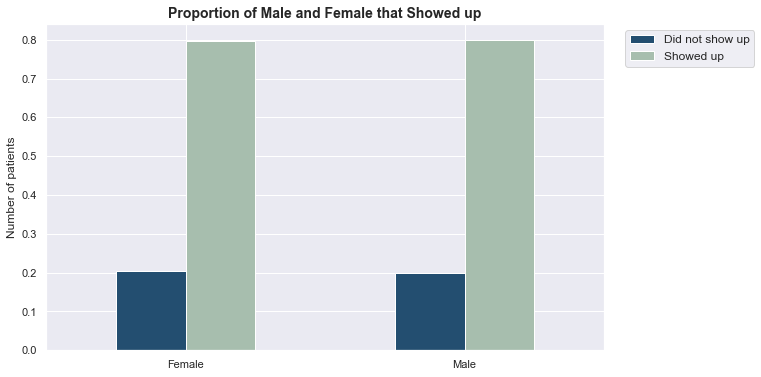

In [19]:
# visualization of proportion of show and no show-ups

proportion.unstack().plot(kind='bar', figsize=(10,6), color=['#234E70', '#A7BEAE'])
plt.ylabel('Number of patients')
plt.xlabel('')
plt.title('Proportion of Male and Female that Showed up', fontweight='bold', fontsize=14)
plt.legend(labels=['Did not show up', 'Showed up'], fontsize=12, bbox_to_anchor=(1.28, 1.00))
plt.xticks([0, 1], ['Female', 'Male'], rotation=0);

>* Seems show-up is **not** affected by Gender. By proportion both Genders saw a near equal amount of show-ups

### Research Question 2:  Which days of the week has the most and least show-ups

In [20]:
# getting total number of appointments based on days of the week

total_ap_week = getTotal('ApDayOfWeek')
total_ap_week

ApDayOfWeek
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: Noshow, dtype: int64

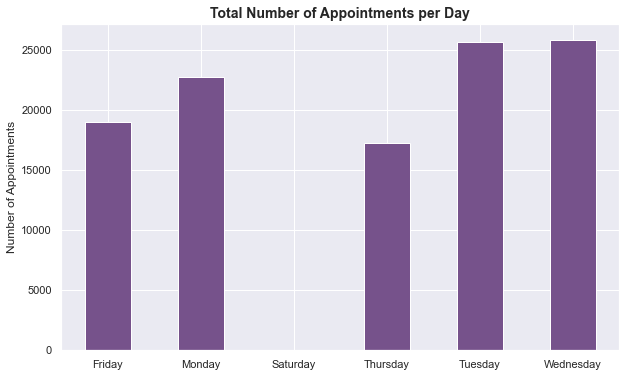

In [21]:
# ploting number of appointments per day

total_ap_week.plot(kind='bar', figsize=(10,6), color=['#76528BFF'])
plt.ylabel('Number of Appointments')
plt.xlabel('')
plt.title('Total Number of Appointments per Day', fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

In [22]:
# total number of appointments for all days showing those who showed up and those who didn't

ap_show_week = getTotalShow('ApDayOfWeek')
ap_show_week

ApDayOfWeek  Noshow
Friday       0          4037
             1         14982
Monday       0          4690
             1         18024
Saturday     0             9
             1            30
Thursday     0          3338
             1         13909
Tuesday      0          5152
             1         20488
Wednesday    0          5093
             1         20774
Name: Noshow, dtype: int64

In [23]:
# getting proportional value of show and no-show-ups across days of the week

proportion = getProportion(total_ap_week, ap_show_week)
proportion

ApDayOfWeek  Noshow
Friday       0         0.212261
             1         0.787739
Monday       0         0.206481
             1         0.793519
Saturday     0         0.230769
             1         0.769231
Thursday     0         0.193541
             1         0.806459
Tuesday      0         0.200936
             1         0.799064
Wednesday    0         0.196892
             1         0.803108
Name: Noshow, dtype: float64

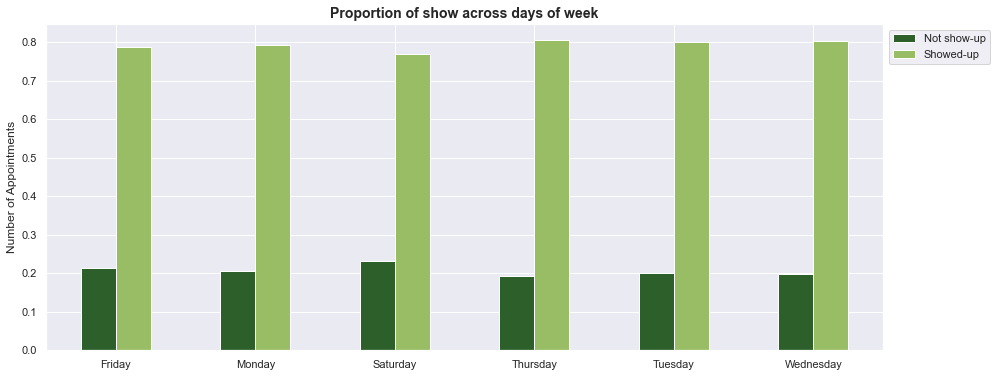

In [24]:
# visualisation 

proportion.unstack().plot(kind='bar', figsize=(15,6), color=['#2C5F2A', '#97BC62FA'])
plt.ylabel('Number of Appointments')
plt.xlabel('')
plt.xticks(rotation=0)
plt.title('Proportion of show across days of week', fontsize=14, fontweight='bold')
plt.legend(labels=['Not show-up', 'Showed-up'], bbox_to_anchor=(1., 1.));

>* Wednesday genarally has the highest number of appointments. However in terms of proportion, **Thursday** has the most. Therefore it is more likly to have the highest number of appointments on Thursday
>* **Saturday** seems to have the least amount show-ups by proportion. This could probably be because its a weekend

### Research Question 3: How does SMS receipt affect show-up

In [25]:
# getting total number of appointments based SMSreceived

SMS_total = getTotal('SMSreceived')
SMS_total

SMSreceived
0    75044
1    35482
Name: Noshow, dtype: int64

In [26]:
# Comparing theno SMSreceived column and Noshow columns

SMS_show_total = getTotalShow('SMSreceived')
SMS_show_total

SMSreceived  Noshow
0            0         12535
             1         62509
1            0          9784
             1         25698
Name: Noshow, dtype: int64

In [27]:
# get proportion 

proportion = getProportion(SMS_total, SMS_show_total)
proportion

SMSreceived  Noshow
0            0         0.167035
             1         0.832965
1            0         0.275745
             1         0.724255
Name: Noshow, dtype: float64

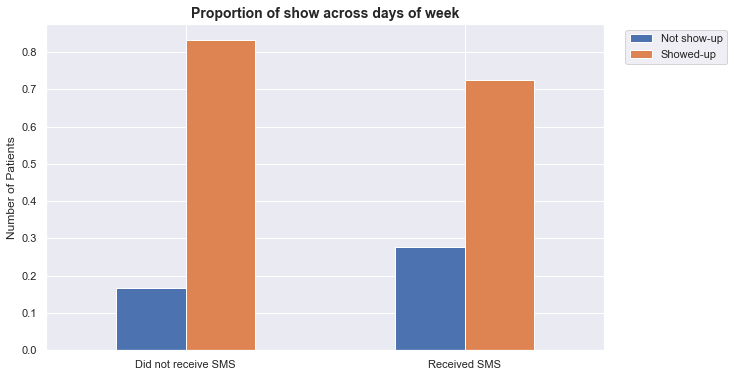

In [28]:
# visualization

proportion.unstack().plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of Patients')
plt.xlabel('')
plt.xticks([0,1 ], ['Did not receive SMS', 'Received SMS'], rotation=0)
plt.title('Proportion of show across days of week', fontsize=14, fontweight='bold')
plt.legend(labels=['Not show-up', 'Showed-up'], bbox_to_anchor=(1.23, 1.));

>* More people who didn't receive SMS showed-up. This could probably mean that the SMS was sent to follow up those who didn't show up on their appointment day



<a id='conclusions'></a>
## Conclusions

>* Seems show-up is **not** affected by Gender. By proportion both Genders saw a near equal amount of show-ups

>* Wednesday genarally has the highest number of appointments. However in terms of proportion, **Thursday** has the most. Therefore it is more likely to have a higher number of appointments on Thursday
>* **Saturday** seems to have the least amount show-ups by proportion. This could probably be because its a weekend

>* More people who didn't receive SMS showed-up. This could probably mean that the SMS was sent to follow up those who didn't show up on their appointment day

>* Further area of exploration may include finding out which are range tends to keep their appointment
>* Finding out the number of days between the scheduled day and appointment day and how this affect showing up